In [1]:
%pip install -U -q "google-generativeai>=0.8.3"

In [2]:
import google.generativeai as genai

from google.colab import userdata
api_key = userdata.get('GOOGLE_API_KEY')


In [4]:
genai.configure(api_key = api_key)

In [6]:
for model in genai.list_models():
  print(model.name)

# Embedding models available are 1> models/embedding-001, 2> models/text-embedding-004

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/learnlm-1.5-pro-experimental
models/gemini-exp-1114
models/gemini-exp-1121
models/embedding-001
models/text-embedding-004
models/aqa


#Calculating Similarity Scores

In [7]:
texts = [
    'The quick brown fox jumps over the lazy dog.',
    'The quick rbown fox jumps over the lazy dog.',
    'teh fast fox jumps over the slow woofer.',
    'a quick brown fox jmps over lazy dog.',
    'brown fox jumping over dog',
    'fox > dog',
    # Alternative pangram for comparison:
    'The five boxing wizards jump quickly.',
    # Unrelated text, also for comparison:
    'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Vivamus et hendrerit massa. Sed pulvinar, nisi a lobortis sagittis, neque risus gravida dolor, in porta dui odio vel purus.',
]
response = genai.embed_content(model = 'models/text-embedding-004',
                               content = texts,
                               task_type = 'semantic_similarity')


In [15]:
# Each text is embedded in a vector of shape (768,)
len(response['embedding'][0])

768

In [8]:
def truncate_text(t: str, limit: int = 50) -> str:
  if len(t) > limit:
    return t[: limit-3] + '...'
  else:
    return t

truncated_texts = [truncate_text(t) for t in texts]

In [9]:
print(truncated_texts)

['The quick brown fox jumps over the lazy dog.', 'The quick rbown fox jumps over the lazy dog.', 'teh fast fox jumps over the slow woofer.', 'a quick brown fox jmps over lazy dog.', 'brown fox jumping over dog', 'fox > dog', 'The five boxing wizards jump quickly.', 'Lorem ipsum dolor sit amet, consectetur adipisc...']


similarity score by U^(t)V, But firstly the vector are normalized, this is also called cosine similarity.
- range between 0(not similar) to 1(similar).

<Axes: >

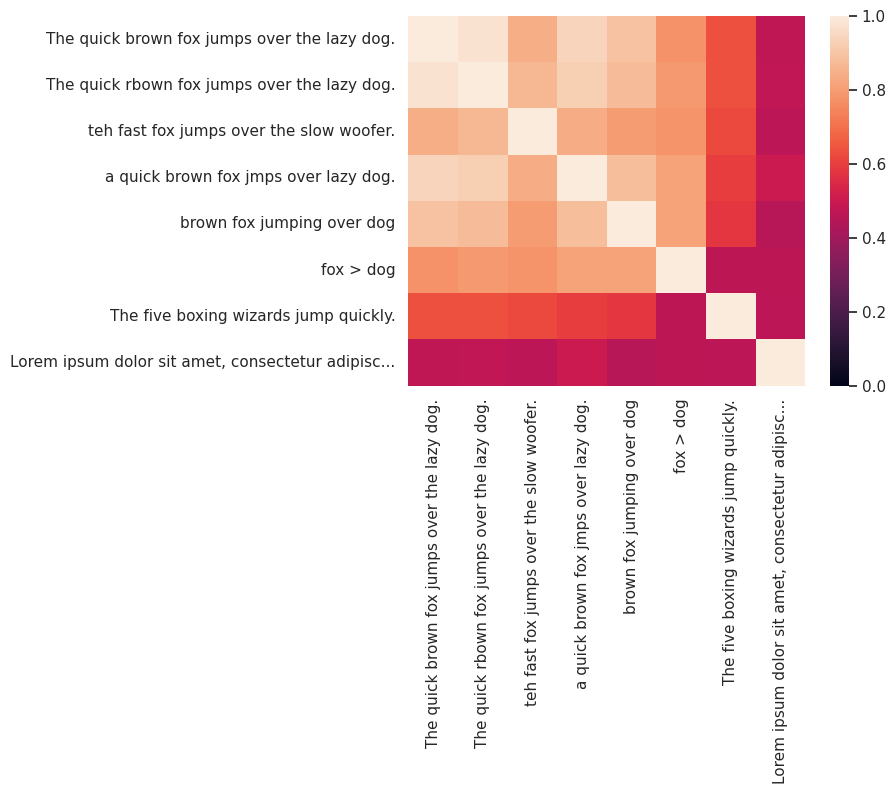

In [16]:
import pandas as pd
import seaborn as sns
sns.set()

df = pd.DataFrame(response['embedding'], index = truncated_texts)
sim = df @ df.T

sns.heatmap(sim, vmin = 0, vmax= 1)

Dark 0, light = 1

In [18]:
df @ df.T

,The quick brown fox jumps over the lazy dog.,The quick rbown fox jumps over the lazy dog.,teh fast fox jumps over the slow woofer.,a quick brown fox jmps over lazy dog.,brown fox jumping over dog,fox > dog,The five boxing wizards jump quickly.,"Lorem ipsum dolor sit amet, consectetur adipisc..."
The quick brown fox jumps over the lazy dog.,0.999999,0.975623,0.842152,0.939730,0.894507,0.776455,0.635346,0.472174
The quick rbown fox jumps over the lazy dog.,0.975623,0.999998,0.864418,0.924603,0.877127,0.790081,0.636155,0.473208
teh fast fox jumps over the slow woofer.,0.842152,0.864418,0.999998,0.839420,0.799849,0.777649,0.618033,0.464342
a quick brown fox jmps over lazy dog.,0.939730,0.924603,0.839420,0.999998,0.882786,0.814692,0.594895,0.496114
brown fox jumping over dog,0.894507,0.877127,0.799849,0.882786,0.999999,0.813739,0.579930,0.451758
fox > dog,0.776455,0.790081,0.777649,0.814692,0.813739,0.999999,0.466796,0.467585
The five boxing wizards jump quickly.,0.635346,0.636155,0.618033,0.594895,0.579930,0.466796,0.999999,0.464358
"Lorem ipsum dolor sit amet, consectetur adipisc...",0.472174,0.473208,0.464342,0.496114,0.451758,0.467585,0.464358,0.999984
